In [13]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import IPython.display as display
import random as rand
import ipywidgets as widgets 
from mpl_toolkits import mplot3d


# Universal Electric Potential Field Solver

#### Brayden Freitas, Emily Richards, Gabe Hofferman

Electric potential fields are importeant in predicting many things within physics and related fields, esspecially in regards to the trajectories of charged particles. 

The electric potential field $V$ from any arbitray charge distribution is dictated by Poisson's equation, which in two dimensions is: $$\nabla^2 V = -\frac{\rho}{\epsilon}.$$ 

When the charge density is 0 (as in the case of finding the potential between charged objects), this becomes Laplace's equation, which we write using the second-order differential operator of the laplacian instead of $\nabla^2$ to indicate that we will be more focused on the PDE aspect of the solution than the calculus aspect: $$\Delta V=0$$ which can be viewed as a basic Green's theorem problem for a harmonic function, with the boundary conditions $D$ and $\delta D$ illustrated below.

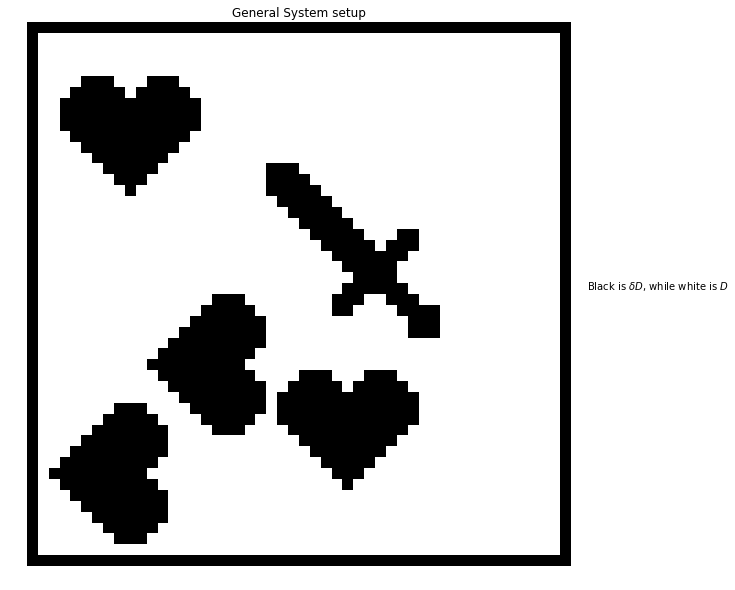

In [14]:
def cArys(x,y):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    return V,TF

def bgArys(ind,rot,pot):
    if ind==0:
        A=[[0,0,pot,pot,pot,0,0,0,pot,pot,pot,0,0],
           [0,pot,pot,pot,pot,pot,0,pot,pot,pot,pot,pot,0],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
           [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
           [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
           [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0],
           [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
           [0,0,0,0,0,pot,pot,pot,0,0,0,0,0],
           [0,0,0,0,0,0,pot,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[0,0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [0,0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0],
          [0,0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0],
          [0,0,0,0,0,0,0,0,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,0,0,0,pot,pot,pot,pot,pot,0,0,0,0],
          [0,0,pot,pot,pot,0,pot,pot,pot,pot,pot,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0,0,0],
          [0,0,pot,pot,pot,0,0,pot,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,pot,0,0,0,0,pot,pot,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,0,0,0]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[0,0,0,0,0,0,0,pot,pot,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,0,pot,pot,pot,pot,0,0,0,0,0,0],
          [0,0,0,0,0,pot,pot,pot,pot,pot,pot,0,0,0,0,0],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0,0],
          [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,0],
          [0,pot,pot,pot,pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
          [pot,pot,pot,pot,pot,0,0,0,0,0,0,pot,pot,pot,pot,pot],
          [pot,pot,pot,0,0,0,0,0,0,0,0,0,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[0,0,0,0,0,pot,0,pot,0,0,0,0],
        [0,0,0,0,0,0,pot,0,0,0,0,0],
        [0,0,0,0,0,0,pot,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,0,0,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,pot,pot,pot,pot,0,0],
        [0,0,0,0,0,0,0,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,0,0,0],
        [pot,pot,pot,pot,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,0,0,0,0,0,0,0],
        [pot,pot,pot,0,0,pot,pot,pot,pot,pot,pot,0],
        [pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot,pot],
        [0,0,pot,pot,pot,pot,pot,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,pot],
        [0,0,0,0,0,0,0,0,0,pot,pot,0],
        [0,0,0,0,0,0,0,0,pot,pot,pot,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,pot,pot,0,0 ,0],
        [0,0,0,0,0,0,0,0,pot,0,0 ,0]]
        return rota(np.array(A),rot)
    return False

def rota(A,rot):
    for n in range(0,rot):
        A=np.rot90(A)
    return A

def insrt(xi,yi,A,V,TF):
    lx,ly=np.shape(A)
    if np.all(TF[xi:xi+lx,yi:yi+ly]==True):
        V[xi:xi+lx,yi:yi+ly]=A
        TF[xi:xi+lx,yi:yi+ly]=(A==0)
        return False
    else:
        return True
    
def genInit(x,y,nSmall,minPot,maxPot):
    V,TF=cArys(x,y)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,3)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=bgArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

V1,TF1=genInit(50,50,5,-5,5)
plt.figure(figsize=(10,10))
plt.title("General System setup")
plt.imshow(TF1.T,cmap="binary",origin="lower")
plt.axis("off")
plt.text(51,25,"Black is $\delta D$, while white is $D$")
plt.show()

Where the above system is described as $$\left\{\begin{align*}
\Delta V(\vec{x}) &= 0  &\vec{x}\in D  \\
V(\vec{x})&= f &\vec{x}\in\delta D
\end{align*}\right..$$

Because of this, the Mean-Value Property can be applied, which states that: $$\forall \: \vec{x_o}\in D, V(\vec{x_0})=\frac{1}{|\delta B_r(\vec{x_0})|}\iint_{\delta B_r(\vec{x_0})}V(\vec{x})\:d\vec{S},$$
or rather, that the value of $V$ at any point $\vec{x_0}$ in $D$ is dependent upon the average of all the points equidistant from $\vec{x_0}$, represedented by a ball centered at $\vec{x_0}$ called $\delta B_r(\vec{x_0})$. The benefit of this is that it is possible to discretize the system, treating the whole system $\bar{D}=D\cup\delta D$ as an array of the size $i,j$ called $\bar{D_{ij}}$. While $\delta B_r(\vec{x_0})$ is **any** set of points equidistant from $\vec{x_0}$, $\delta B_1(\vec{x_0})$ is the set of 4 points directly adjacent to $\vec{x_0}$, and as such is the smallest possible set of $\delta B_r(\vec{x_0})$ in $\bar{D_{ij}}$ which is not just $\{\vec{x_0}\}$. This is where the method of relaxation arises from rigorously. Since we are only taking into consideration the closest points, we need to run this multiple times until the function is nearly smooth (defined by some tolerance).

One difficulty is that, because of our random system, we need some way of always differentiating between $D$ and $\delta D$. This is why we generate a True/False array, which we have as True for boundary conditions($\delta D$), and False for other locations ($D$).

We can generate systems of any size, in both cases with outside boundaries of all 0, as well as having two walls at any two potentials to create an overall potential difference to allow charge to flow in one preferential direction.

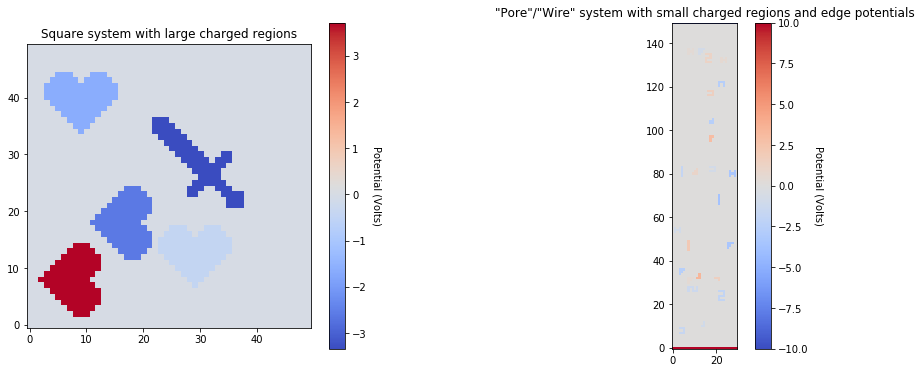

In [15]:
def cArysPore(x,y,Vn,Vp):
    V=np.zeros((x,y))
    TF=np.ones((x,y),dtype=bool)
    Fy=np.zeros((1,y),dtype=bool)
    Fx=np.zeros((1,x),dtype=bool)
    Vp=Vp*np.ones((1,x))
    Vn=Vn*np.ones((1,x))
    TF[0]=TF[x-1]=Fy
    TF.T[0]=TF.T[y-1]=Fx
    V.T[0]=Vn
    V.T[-1]=Vp
    return V,TF

def smArys(ind,rot,pot):
    if ind==0:
        A=[[pot,pot,0],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==1:
        A=[[pot,pot,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==2:
        A=[[pot,pot,pot],[0,0,pot],[pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==3:
        A=[[pot,pot,pot,0,pot],[pot,0,pot,0,pot],[pot,0,pot,pot,pot]]
        return rota(np.array(A),rot)
    if ind==4:
        A=[[pot,pot,pot],[0,pot,pot],[0,0,pot]]
        return rota(np.array(A),rot)
    if ind==5:
        A=[[pot,0,pot],[pot,pot,pot],[pot,0,pot]]
        return rota(np.array(A),rot)
    if ind==6:
        A=[[0,pot],[0,pot],[pot,pot]]
        return rota(np.array(A),rot)
    return False
        
def genPore(x,y,nSmall,minPot,maxPot,Vn,Vp):
    V,TF=cArysPore(x,y,Vn,Vp)
    for n in range(nSmall):
        check=True
        while check:
            ind=rand.randint(0,6)
            rot=rand.randint(0,3)
            pot=rand.uniform(minPot,maxPot)
            A=smArys(ind,rot,pot)
            xi=rand.randint(0,x-1)
            yi=rand.randint(0,y-1)
            check=insrt(xi,yi,A,V,TF)
    TF=np.logical_not(TF)
    return V,TF

##########################################################################################################

V,TF=genPore(30,150,25,-5,5,10,-10)
plt.figure(figsize=(14,6))
plt.subplot(121)
plt.title("Square system with large charged regions")
plt.imshow(V1.T,cmap="coolwarm",origin="lower")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.subplot(122)
plt.title('"Pore"/"Wire" system with small charged regions and edge potentials')
plt.imshow(V.T,cmap="coolwarm",origin="lower")
cbar=plt.colorbar()
cbar.set_label("Potential (Volts)", rotation=270,labelpad=15)
plt.show()

In [16]:
def solver(V, TF):
    V_plot=V.copy()
    dif= 1
    tol= 10**-6
    while dif >= tol:
        V_plot_last = V_plot.copy()
        left = np.roll(V_plot, 1, axis=1)
        right = np.roll(V_plot, -1, axis=1)
        above = np.roll(V_plot, -1, axis=0)
        below = np.roll(V_plot, 1, axis=0)
        V_plot[1:-1, 1:-1] = 0.25*(left[1:-1, 1:-1] + right[1:-1, 1:-1] +above[1:-1, 1:-1] + below[1:-1, 1:-1]) #relax calc

        np.add(V_plot, -V_plot, out=V_plot, where =TF)
        np.add(V_plot, V, out=V_plot, where =TF)
        dif = np.max(abs(V_plot_last-V_plot))
    return V_plot
        
def genInit_widget(x,y,nSmall,minPot,maxPot):
    V,TF=genInit(x,y,nSmall,minPot, maxPot)
    V_plot=solver(V, TF)
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    plt.imshow(V.T, origin="lower", cmap="coolwarm")
    plt.colorbar(pad=.085)
    plt.subplot(122)
    plt.imshow(V_plot.T, origin="lower", cmap="coolwarm")
    plt.subplots_adjust(wspace=0, right=.825)
    

slider1 = widgets.IntSlider(min=0, max=25, step=1, value=13,continuous_update=False)
slider2 = widgets.IntSlider(min=-100, max=100, step=1, value=10,continuous_update=False)
slider3 = widgets.IntSlider(min=-100, max=100, step=1, value=-10,continuous_update=False)

gui = widgets.interactive(genInit_widget, x=widgets.fixed(100), y=widgets.fixed(100), nSmall=slider1,minPot=slider3, maxPot=slider2)
display.display(gui)

interactive(children=(IntSlider(value=13, continuous_update=False, description='nSmall', max=25), IntSlider(va…

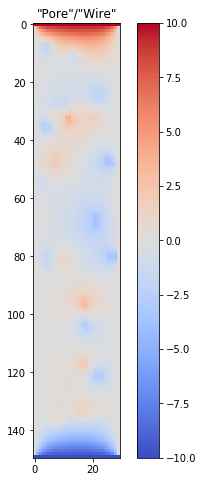

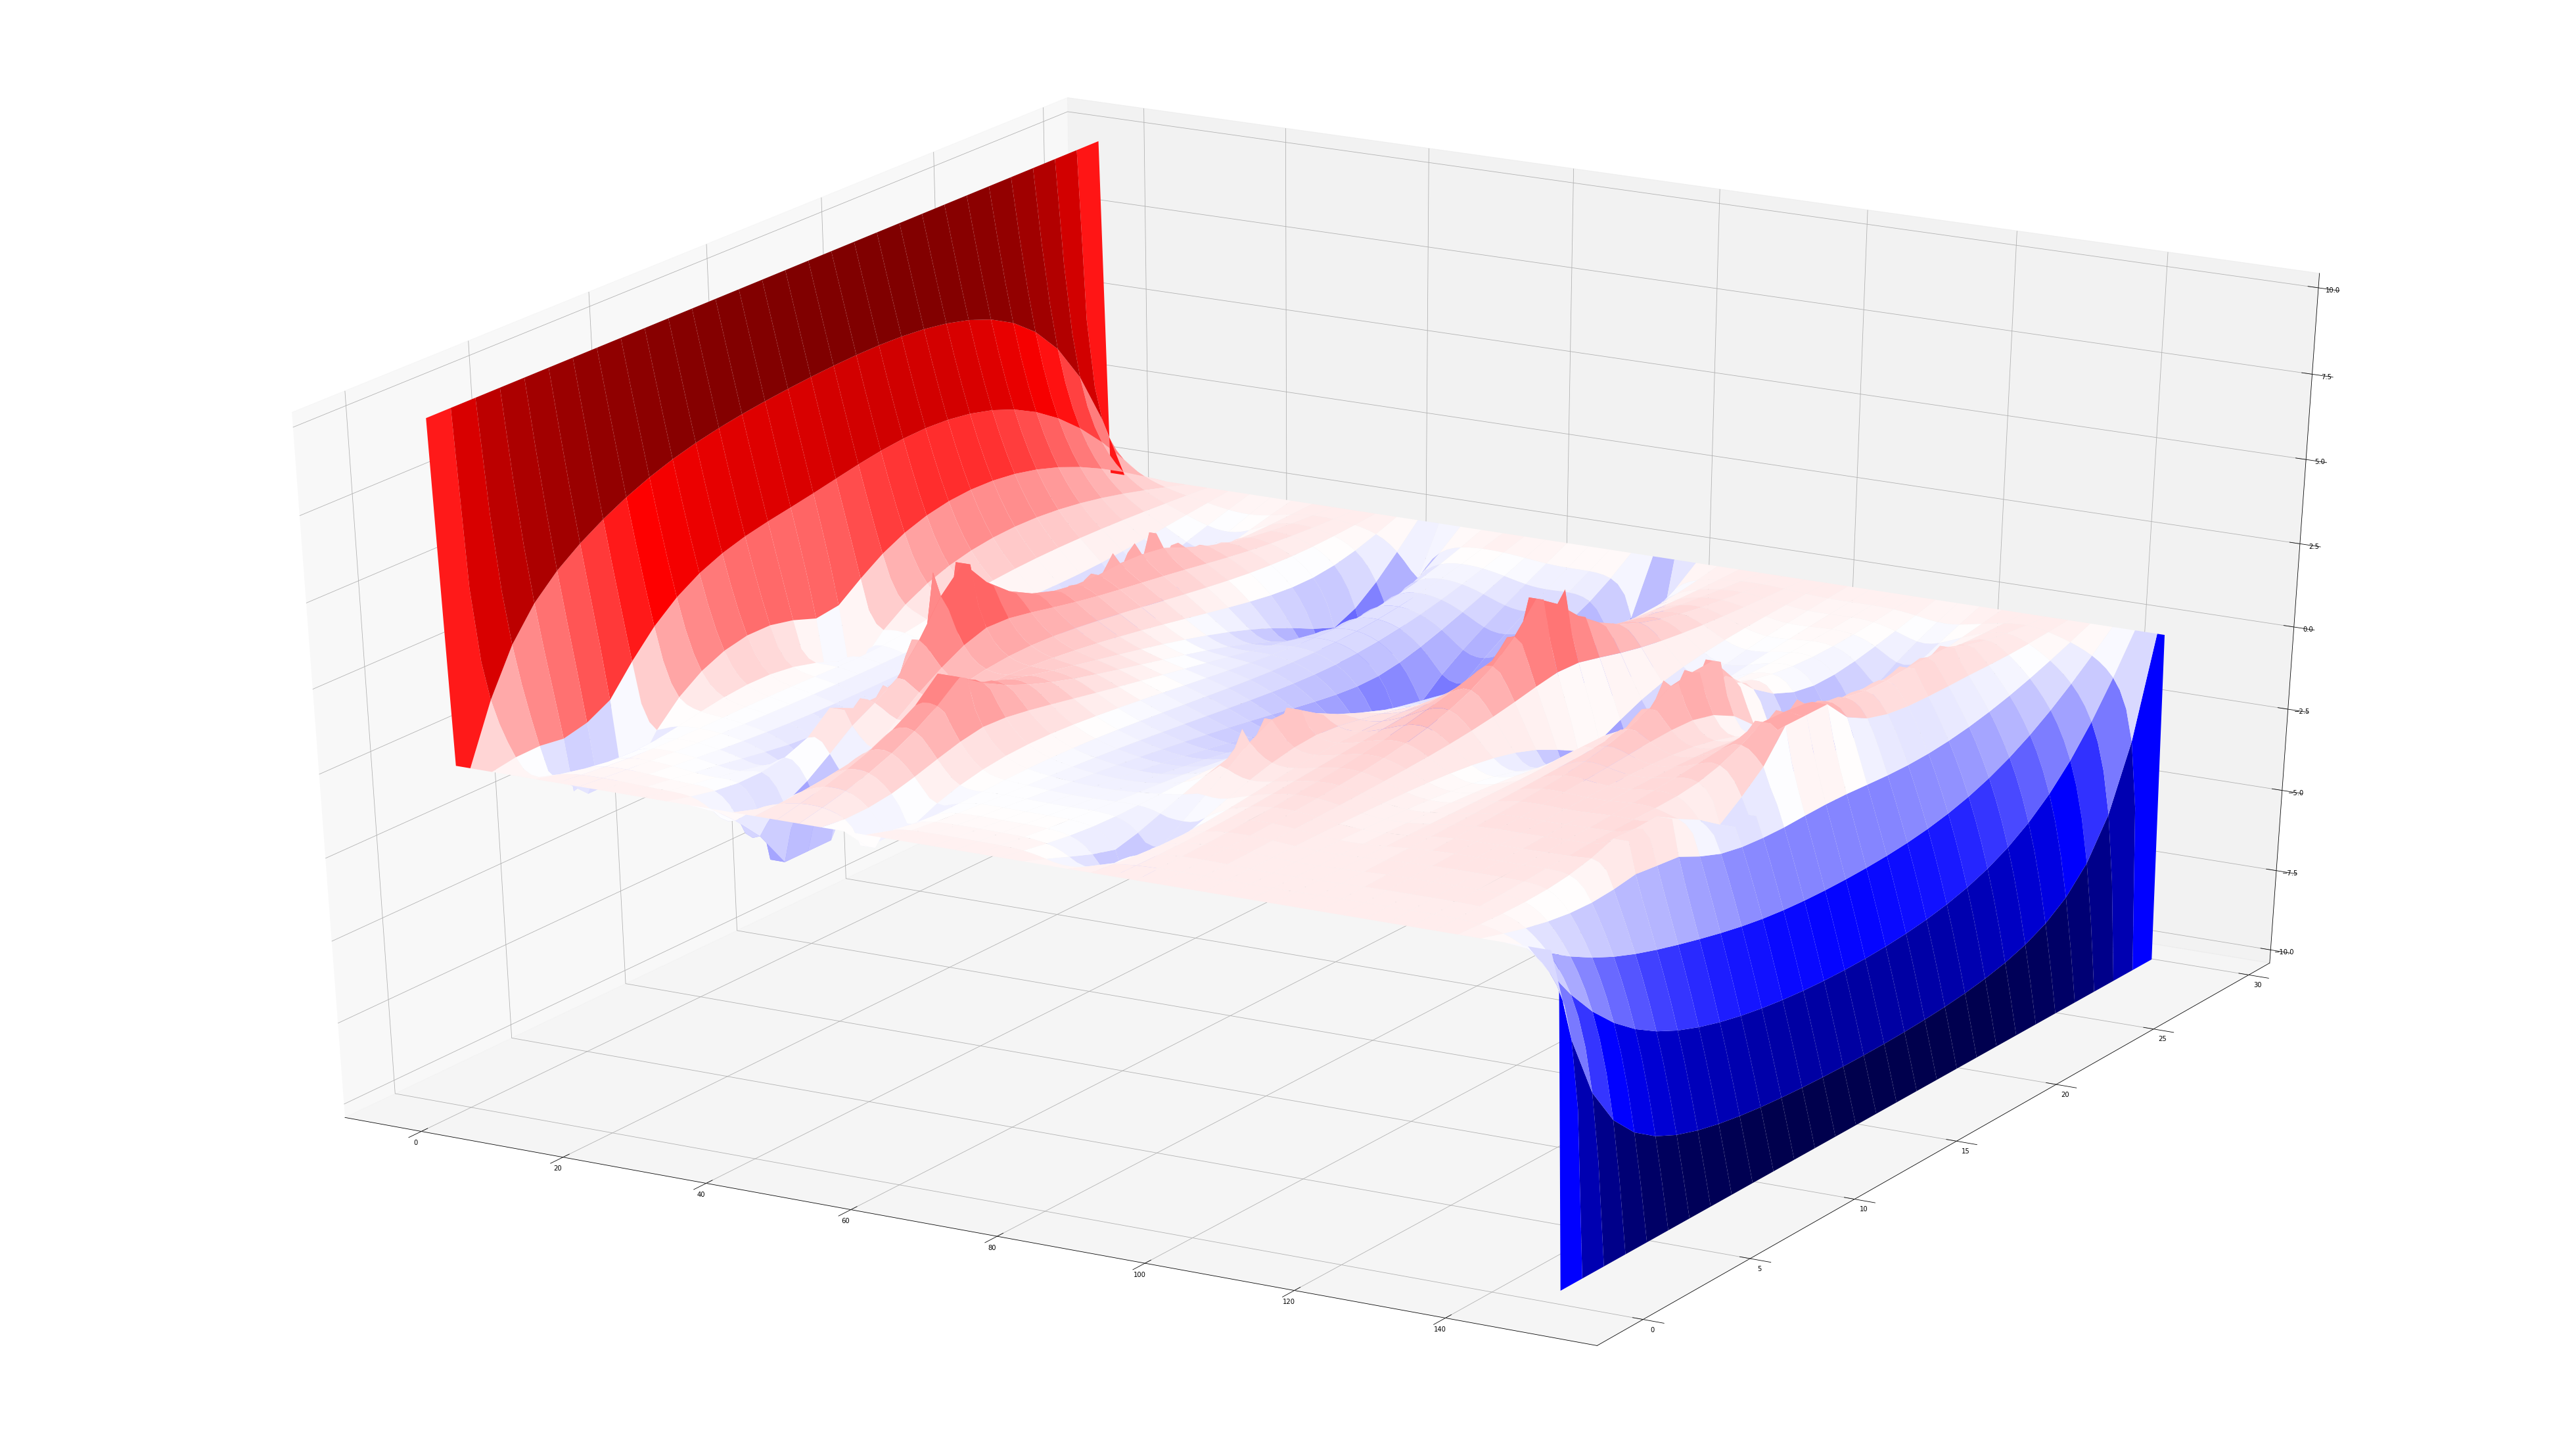

In [17]:
V_plot=solver(V,TF)
plt.figure(figsize=(6,8))
plt.title('"Pore"/"Wire"')
plt.imshow(V_plot.T,cmap="coolwarm")
plt.colorbar();




x=range(30)
y=range(150)
x, y=np.meshgrid(x,y)
fig = plt.figure(figsize=(70,40))
ax = plt.axes(projection='3d')
ax.plot_surface(y, x, V_plot.T, cmap="seismic")


plt.show()

In this section, we used the solved potential from the relaxation method and took the gradient of it in order to then solve for the equation of motion for a point charge dropped in the field. We know that $$ \vec{E} = -\nabla V $$ 

This can be split into $x$ and $y$ components $E_x$ and $E_y$, where $\vec{E} = E_x\hat{x} + E_y\hat{y}$. $\:$       $ {E_x} = \frac{\partial V}{\partial x}  $ and $ {E_y} = \frac{\partial V}{\partial y}  $. To solve for the equation of motion, we use the relation:

$$ \vec{F} = m\ddot{\vec{r}} = q\vec{E} = F_x\hat{x} + F_y\hat{y} $$ 

Where $m$ and $q$ are the mass and charge of the point charge, respectively.
To be able to code this properly, we split $F$ into components to solve for acceleration in the $x$ and $y$ directions:

$$ \vec{F_x} = m\ddot{x} = m\vec{a_x} = q\vec{E_x}, \:\:\: F_y = m\ddot{y} = ma_y = qE_x $$ 


This yields expressions for the components of acceleration: 

$$ \ddot{x} = a_x = \frac{qE_x}{m}, \:\:\: \ddot{y} = a_y = \frac{qE_y}{m} $$

From here, it is straightforward to solve for the equations of motion in both the $x$ and $y$ directions.

$$ v_x(t) = \frac{qE_x}{m}t + v_{x0}, \:\:\: v_y(t) = \frac{qE_y}{m}t + v_{y0} $$

$$ x(t) = \frac{1}{2}\frac{qE_x}{m}t^2 + v_{x0}t + x_0 , \:\:\: y(t) = \frac{1}{2}\frac{qE_y}{m}t^2 + v_{y0}t + y_0 $$ 

With these equations, given an initial position and velocity for a point charge, we are able to animate the trajectory it will take when dropped in a potential region. We defined functions for both a simple box of potential, as well a point charge moving through a pore.  

In [32]:
def MotionBox(pc, dt):
    vx = pc[4] + ax[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt
    vy = pc[5] + ay[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt
    x = 0.5*ax[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt**2 + vx*dt + pc[2]
    y = 0.5*ay[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt**2 + vy*dt + pc[3]
    x_L, y_L = np.shape(V1_plot)
    if x < 0:
        x = -x
        vx = -vx
    if x > x_L:
        x = 2*x_L - x
        vx = -vx
    if y < 0:
        y = -y
        vy = -vy
    if y > y_L:
        y = 2*y_L - y
        vy = -vy
        
    pc[2:] = [x,y,vx,vy]
    
def MotionPore(pc, dt):
    vx = pc[4] + ax[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt
    vy = pc[5] + ay[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt
    x = 0.5*ax[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt**2 + vx*dt + pc[2]
    y = 0.5*ay[int(np.floor(pc[2])), int(np.floor(pc[3]))]*dt**2 + vy*dt + pc[3]
    x_L, y_L = np.shape(V_plot)
    if x < 0:
        x = -x
        vx = -vx
    if x > x_L:
        x = 2*x_L - x
        vx = -vx
    if y < 0:
        y = -y
        vy = -vy
    if y > y_L:
        y = 0
        vy = 0
        vx = 0
    
    pc[2:] = [x,y,vx,vy]
    


In [34]:
V1_plot = solver(V1, TF1)
q = 1
m = 1
x0, y0, vx0, vy0 = 25,25,0,0
Ex, Ey = np.gradient(V1_plot)
ax, ay = -q*Ex/m, -q*Ey/m
pc=[m,q,x0,y0,vx0,vy0]

fig = plt.figure(figsize=(6,6))
anr, = plt.plot([], "o", markersize=5, color="magenta")
plt.imshow(V1_plot.T, cmap="coolwarm", origin="lower")
trajectory = []
steps = 1000
t_step = 10
for t in range(steps):
    if t%t_step == 0:
        trajectory.append(pc.copy())
    MotionBox(pc, .1)  
    
def animate(frame):
    anr.set_data(trajectory[frame][2], trajectory[frame][3])
anim = FuncAnimation(fig, animate, frames=steps//t_step, interval=50)
video = anim.to_html5_video()
plt.close()
display.HTML(video)

In [19]:
q = 1
m = 1
x0, y0, vx0, vy0 = 15,0,0,0
Ex, Ey = np.gradient(V_plot)
ax, ay = -q*Ex/m, -q*Ey/m
pc=[m,q,x0,y0,vx0,vy0]

fig = plt.figure(figsize=(6,6))
anr, = plt.plot([], "o", markersize=5, color="magenta")
plt.imshow(V_plot.T, cmap="coolwarm", origin="lower")
trajectory = []
steps = 10000
t_step = 10
for t in range(steps):
    if t%t_step == 0:
        trajectory.append(pc.copy())
    MotionPore(pc, .1)  
    
def animate(frame):
    anr.set_data(trajectory[frame][2], trajectory[frame][3])
anim = FuncAnimation(fig, animate, frames=steps//t_step, interval=50)
video = anim.to_html5_video()
plt.close()
display.HTML(video)